In [43]:
import scipy.io
import pandas as pd

mat_data = scipy.io.loadmat('features_score.mat')
channels = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']
bands = ['delta','theta','alpha','beta','gamma']
columns = [band + '_' + channel for band in bands for channel in channels] + ['valence', 'arousal', 'dominance']
features_score = pd.DataFrame(data=mat_data['features_score'], columns=columns)
features_score.head()

,delta_AF3,delta_F7,delta_F3,delta_FC5,delta_T7,delta_P7,delta_O1,delta_O2,delta_P8,delta_T8,...,gamma_O2,gamma_P8,gamma_T8,gamma_FC6,gamma_F4,gamma_F8,gamma_AF4,valence,arousal,dominance
0,0.011164,0.020966,0.048005,0.072145,0.071067,0.016845,0.082254,-0.000926,0.042265,0.060465,...,-2.091685,-0.796073,-0.518427,-1.933251,-0.236057,-0.572236,-1.228579,4.0,3.0,2.0
1,0.006011,0.013398,-0.003920,0.002258,-0.003038,-0.003637,0.002840,-0.002033,-0.002719,-0.009582,...,-0.155154,-0.600481,-0.451111,-0.757246,-0.716408,-0.654672,-1.588320,3.0,3.0,1.0
2,-0.000494,0.002736,-0.008544,-0.028483,0.029116,-0.037526,-0.002768,0.035064,0.022569,0.033482,...,3.794247,3.750092,4.332144,2.577660,0.935229,4.024972,4.022484,5.0,4.0,4.0
3,-0.007730,-0.006793,0.019500,0.018707,0.019598,-0.009959,0.001426,0.002455,0.017283,0.006486,...,0.166544,-0.072117,0.480848,-0.546483,0.086675,0.781761,-0.223798,4.0,3.0,2.0
4,-0.004417,0.001490,0.361473,0.002768,0.006072,0.010637,0.013658,0.048942,0.007248,0.003749,...,-0.762240,1.163760,0.810399,0.210855,0.092152,-0.361955,0.797280,4.0,4.0,4.0


In [60]:
features_score_binary = features_score.copy()
features_score_binary.valence = features_score_binary.valence.apply(lambda valence: 1 if valence > 3 else 0)
features_score_binary.arousal = features_score_binary.arousal.apply(lambda valence: 1 if valence > 3 else 0)
features_score_binary.dominance = features_score_binary.dominance.apply(lambda valence: 1 if valence > 3 else 0)
features_score_binary.head()

,delta_AF3,delta_F7,delta_F3,delta_FC5,delta_T7,delta_P7,delta_O1,delta_O2,delta_P8,delta_T8,...,gamma_O2,gamma_P8,gamma_T8,gamma_FC6,gamma_F4,gamma_F8,gamma_AF4,valence,arousal,dominance
0,0.011164,0.020966,0.048005,0.072145,0.071067,0.016845,0.082254,-0.000926,0.042265,0.060465,...,-2.091685,-0.796073,-0.518427,-1.933251,-0.236057,-0.572236,-1.228579,1,0,0
1,0.006011,0.013398,-0.003920,0.002258,-0.003038,-0.003637,0.002840,-0.002033,-0.002719,-0.009582,...,-0.155154,-0.600481,-0.451111,-0.757246,-0.716408,-0.654672,-1.588320,0,0,0
2,-0.000494,0.002736,-0.008544,-0.028483,0.029116,-0.037526,-0.002768,0.035064,0.022569,0.033482,...,3.794247,3.750092,4.332144,2.577660,0.935229,4.024972,4.022484,1,1,1
3,-0.007730,-0.006793,0.019500,0.018707,0.019598,-0.009959,0.001426,0.002455,0.017283,0.006486,...,0.166544,-0.072117,0.480848,-0.546483,0.086675,0.781761,-0.223798,1,0,0
4,-0.004417,0.001490,0.361473,0.002768,0.006072,0.010637,0.013658,0.048942,0.007248,0.003749,...,-0.762240,1.163760,0.810399,0.210855,0.092152,-0.361955,0.797280,1,1,1


In [49]:
valenceProportion = features_score_binary.valence.value_counts() / len(features_score_binary)
arousalProportion = features_score_binary.arousal.value_counts() / len(features_score_binary)
dominanceProportion = features_score_binary.dominance.value_counts() / len(features_score_binary)
valenceProportion, arousalProportion, dominanceProportion

(valence
 0    0.60628
 1    0.39372
 Name: count, dtype: float64,
 arousal
 0    0.562802
 1    0.437198
 Name: count, dtype: float64,
 dominance
 0    0.519324
 1    0.480676
 Name: count, dtype: float64)

In [54]:
bands_avg = {}
for i, band in enumerate(bands):
  bands_avg[band] = features_score_binary.iloc[:,i*14:(i+1)*14].mean(axis=1)

features_score_avg = pd.concat([pd.DataFrame(bands_avg), features_score_binary[['valence', 'arousal', 'dominance']]], axis=1)
features_score_avg.head()

,delta,theta,alpha,beta,gamma,valence,arousal,dominance
0,0.039979,-3.215711,-1.337385,-1.281182,-0.825132,1,0,0
1,0.007666,-2.081924,-1.412942,-1.069723,-0.648446,0,0,0
2,0.005581,4.123913,8.101486,8.614339,2.546695,1,1,1
3,0.015886,-1.246908,0.217587,-0.706613,0.081636,1,0,0
4,0.037116,-1.741534,-2.698551,-1.537669,0.379097,1,1,1


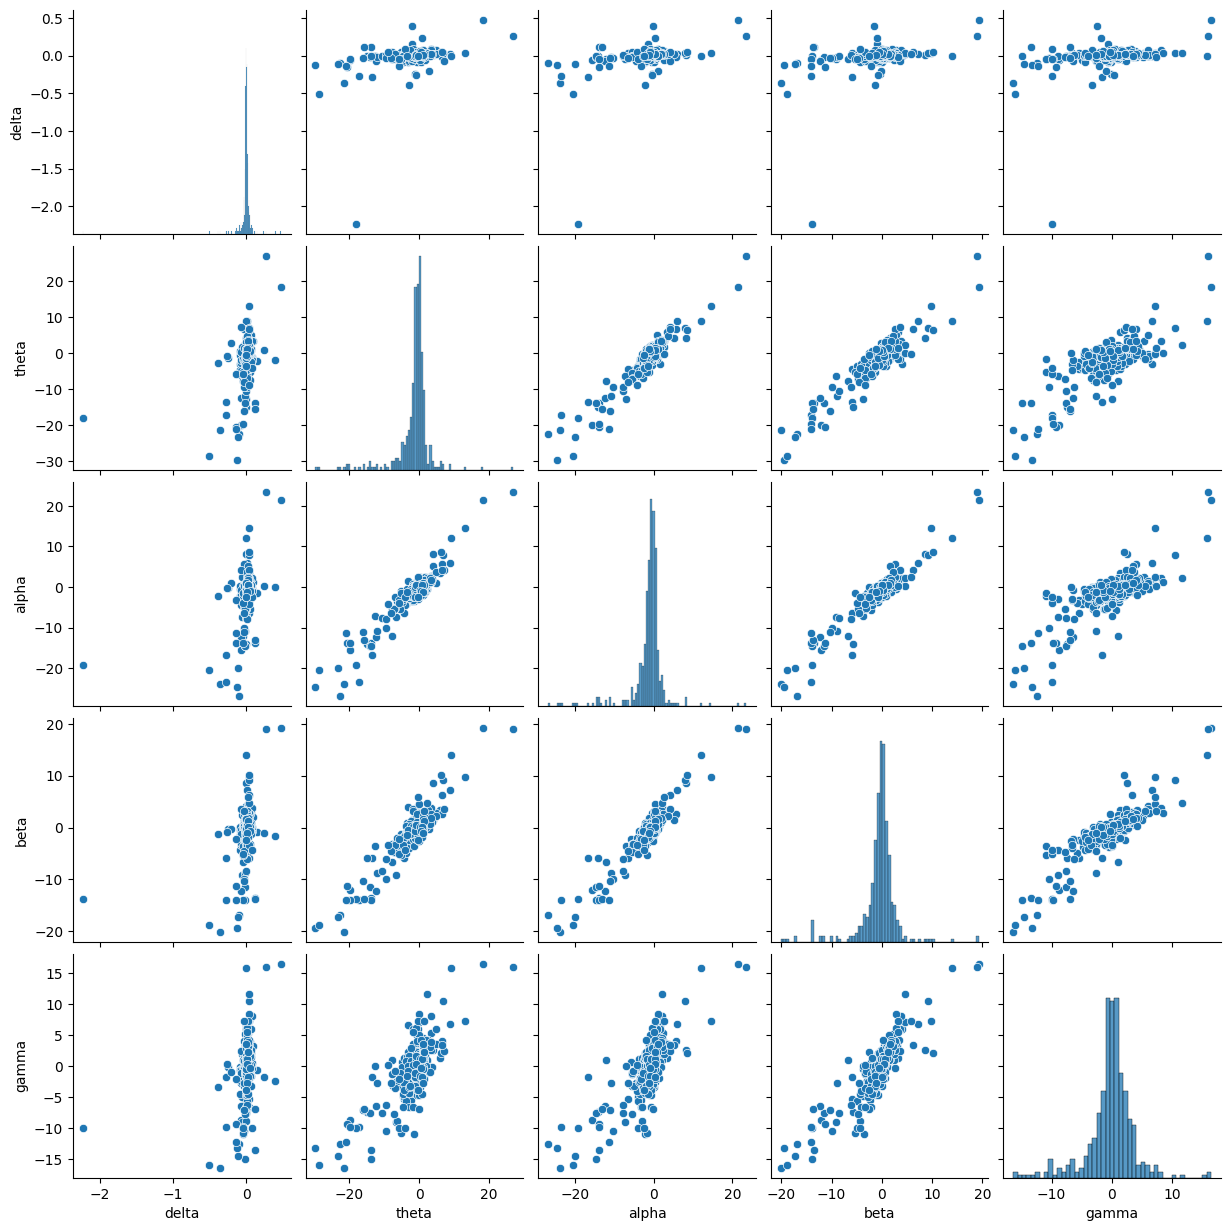

In [57]:
import seaborn as sns
sns.pairplot(data=features_score_avg.iloc[:,:len(bands)])

<Axes: >

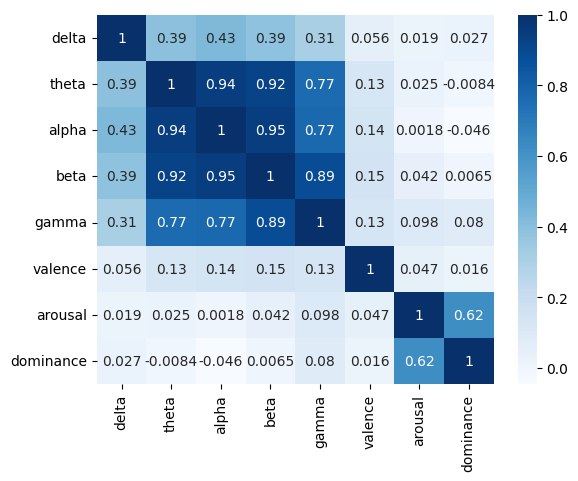

In [58]:
sns.heatmap(data=features_score_avg.corr(), cmap='Blues', annot=True)

## Observation
1. Theta, alpha, beta, gamma bands have strong internal correlation.
2. Delta band has weak correlation with other bands.
3. Non of the bands have clear correlation with valence :(.

<Axes: >

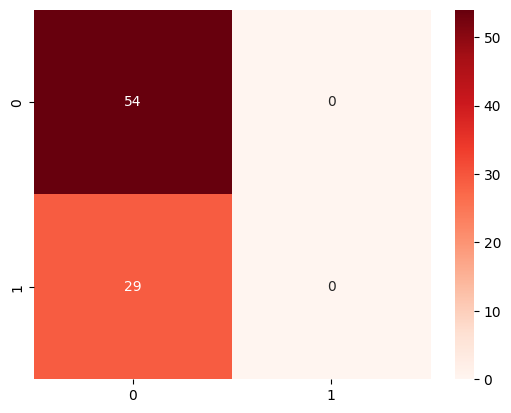

In [69]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X, y = features_score_avg[['theta', 'alpha', 'beta', 'gamma']], features_score_avg['valence']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Quadratic SVM
svm_model = SVC(kernel='poly', degree=2)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Reds')

# Observation
- Pretty much just didn't work

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5044 - loss: 0.7018 - val_accuracy: 0.5663 - val_loss: 0.6674
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6508 - loss: 0.6452 - val_accuracy: 0.5904 - val_loss: 0.6573
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6816 - loss: 0.6082 - val_accuracy: 0.6265 - val_loss: 0.6629
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7102 - loss: 0.5836 - val_accuracy: 0.6024 - val_loss: 0.6658
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7132 - loss: 0.5672 - val_accuracy: 0.5904 - val_loss: 0.6676
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7439 - loss: 0.5435 - val_accuracy: 0.6024 - val_loss: 0.6678
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7557 - loss: 0.5268 - val_accuracy: 0.6024 - val_loss: 0.6743
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7685 - loss: 0.5144 - val_accuracy: 0.5783 - val_loss

c:\Users\ZYD\anaconda3\envs\eeg\lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


<Axes: >

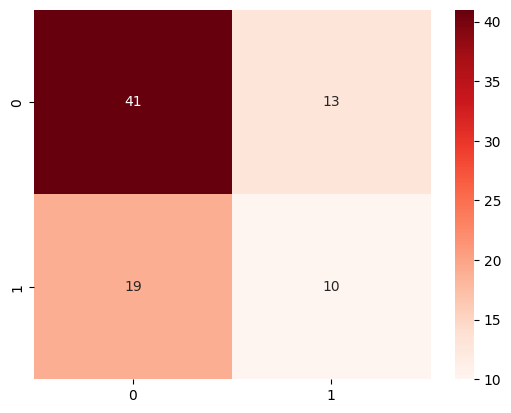

In [81]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

X = features_score_binary.iloc[:,14:len(bands)*len(channels)].values
y = features_score_binary['valence'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Reshape the input data for LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

lstm_model = Sequential()
lstm_model.add(LSTM(units=64, input_shape=(1, 56)))
lstm_model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = lstm_model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Confusion matrix
y_pred = lstm_model.predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int).flatten()
sns.heatmap(confusion_matrix(y_test, y_pred_labels), annot=True, cmap='Reds')

# Observation
- This just learns the distribution.